In [1]:
import GetOldTweets3 as got
import csv,re
import pandas as pd
pd.options.display.max_colwidth = 200
import warnings
warnings.filterwarnings('ignore')

In [2]:
tweetCriteriaBAR = got.manager.TweetCriteria().setQuerySearch("برشلونة").setNear("السعودية").setSince("2018-10-27").setUntil("2018-10-29").setMaxTweets(500)
tweetBAR = got.manager.TweetManager.getTweets(tweetCriteriaBAR)

tweetCriteriaRL = got.manager.TweetCriteria().setQuerySearch("ريال_مدريد").setNear("السعودية").setSince("2018-10-27").setUntil("2018-10-29").setMaxTweets(500)
tweetRL = got.manager.TweetManager.getTweets(tweetCriteriaRL)

tweetCriteriaCL = got.manager.TweetCriteria().setQuerySearch("الكلاسيكو").setNear("السعودية").setSince("2018-10-27").setUntil("2018-10-29").setMaxTweets(500)
tweetCL = got.manager.TweetManager.getTweets(tweetCriteriaCL)



In [3]:
with open('tweetBar.csv', 'w', encoding="utf-8") as csvfile:
    tweetWriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for t in tweetBAR:
        tweetWriter.writerow([[str(t.date)], [t.text], [t.username]])
        
with open('tweetRM.csv', 'w', encoding="utf-8") as csvfile:
    tweetWriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for t in tweetRL:
        tweetWriter.writerow([[str(t.date)], [t.text], [t.username]])
        
with open('tweetCL.csv', 'w', encoding="utf-8") as csvfile:
    tweetWriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for t in tweetCL:
        tweetWriter.writerow([[str(t.date)], [t.text], [t.username]])

In [4]:
df = pd.read_csv('tweetBar.csv',error_bad_lines=False, names = ["Date", "Tweet","Username"])
df2 = pd.read_csv('tweetRM.csv',error_bad_lines=False, names = ["Date", "Tweet","Username"])
df3 = pd.read_csv('tweetCL.csv',error_bad_lines=False, names = ["Date", "Tweet","Username"])

frames = [df, df2, df3]
tweets = pd.concat(frames)
tweets.reset_index(drop=True, inplace=True)
tweets = tweets.sample(frac=1).reset_index(drop=True)
tweets.to_excel("Twitter.xlsx")

In [5]:
tweets.head()

,Date,Tweet,Username
0,['2018-10-28 23:04:10+00:00'],['#برشلونه_ريال_مدريدpic.twitter.com/9gwBIqpmWD'],['7aso0on7000']
1,['2018-10-28 23:28:20+00:00'],['الكبير كبير اسمه الفريق الملكي ريال مدريد فريق العاصمة وليس فريق ضواحي مثل برشلونة'],['218_00005006']
2,['2018-10-28 23:34:13+00:00'],['المدريدي قبل الكلاسيكو: أنت يالبرشلوني تشوف برشلونه كله ميسي وماعندكم الا ميسي وتعتبرون ميسي الفريق كله. المدريدي بعد الكلاسيكو: وينك يارونالدو من بعدك مدريد ماله طعم وماراح اشجعه انا بشجع اليوف...,['BANDAR___Q8']
3,['2018-10-28 23:39:49+00:00'],"['كانفو : "" برشلونة فازوا على مدريد بلا شيء ، لو لعبوا بشكل افضل كانوا سجلوا ١٢ هدفا "" pic.twitter.com/PIwgrp9Ide']",['ZoYaZenat']
4,['2018-10-28 23:38:48+00:00'],['ياعم انا بروش على ريال مدريد اصلا !! مش واخد بالك من الخمسه'],['Nasser11Omar']


In [6]:
for d in tweets['Date']:
    tweets['Date'] = re.sub(r'\d\d\:\d\d\:\d\d\+\d\d\:\d\d','',d)
    tweets['Date'] = re.sub(r'\[\'','',d)
    tweets['Date'] = re.sub(r'\'\]','',d)

In [7]:
tweets.head()

,Date,Tweet,Username
0,['2018-10-28 23:11:57+00:00,['#برشلونه_ريال_مدريدpic.twitter.com/9gwBIqpmWD'],['7aso0on7000']
1,['2018-10-28 23:11:57+00:00,['الكبير كبير اسمه الفريق الملكي ريال مدريد فريق العاصمة وليس فريق ضواحي مثل برشلونة'],['218_00005006']
2,['2018-10-28 23:11:57+00:00,['المدريدي قبل الكلاسيكو: أنت يالبرشلوني تشوف برشلونه كله ميسي وماعندكم الا ميسي وتعتبرون ميسي الفريق كله. المدريدي بعد الكلاسيكو: وينك يارونالدو من بعدك مدريد ماله طعم وماراح اشجعه انا بشجع اليوف...,['BANDAR___Q8']
3,['2018-10-28 23:11:57+00:00,"['كانفو : "" برشلونة فازوا على مدريد بلا شيء ، لو لعبوا بشكل افضل كانوا سجلوا ١٢ هدفا "" pic.twitter.com/PIwgrp9Ide']",['ZoYaZenat']
4,['2018-10-28 23:11:57+00:00,['ياعم انا بروش على ريال مدريد اصلا !! مش واخد بالك من الخمسه'],['Nasser11Omar']


In [8]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
for i in range(len(tweets)):
    tweets['Tweet'][i] = re.sub(r"https://.*/.*$",'',tweets['Tweet'][i]) #Delete links
    tweets['Tweet'][i] = re.sub(r"http://.*/.*$",'',tweets['Tweet'][i]) #Delete links
    tweets['Tweet'][i] = emoji_pattern.sub(r'', tweets['Tweet'][i]) #Delete Emoji
    tweets['Tweet'][i] = re.sub(r"\\n",'',tweets['Tweet'][i]) # Delete \n
    tweets['Tweet'][i] = re.sub(r"RT",'',tweets['Tweet'][i]) # Delete RT
    tweets['Tweet'][i] = re.sub(r"\[\'",'',tweets['Tweet'][i]) # Delete ['
    tweets['Tweet'][i] = re.sub(r"\'\]",'',tweets['Tweet'][i]) # Delete ']
    tweets['Tweet'][i] = re.sub(r"pic.twitter.com/.*$",'',tweets['Tweet'][i]) # Delete ']
        

In [9]:
tweets.head()

,Date,Tweet,Username
0,['2018-10-28 23:11:57+00:00,#برشلونه_ريال_مدريد,['7aso0on7000']
1,['2018-10-28 23:11:57+00:00,الكبير كبير اسمه الفريق الملكي ريال مدريد فريق العاصمة وليس فريق ضواحي مثل برشلونة,['218_00005006']
2,['2018-10-28 23:11:57+00:00,المدريدي قبل الكلاسيكو: أنت يالبرشلوني تشوف برشلونه كله ميسي وماعندكم الا ميسي وتعتبرون ميسي الفريق كله. المدريدي بعد الكلاسيكو: وينك يارونالدو من بعدك مدريد ماله طعم وماراح اشجعه انا بشجع اليوفي.,['BANDAR___Q8']
3,['2018-10-28 23:11:57+00:00,"كانفو : "" برشلونة فازوا على مدريد بلا شيء ، لو لعبوا بشكل افضل كانوا سجلوا ١٢ هدفا """,['ZoYaZenat']
4,['2018-10-28 23:11:57+00:00,ياعم انا بروش على ريال مدريد اصلا !! مش واخد بالك من الخمسه,['Nasser11Omar']


In [10]:
import tashaphyne.arabic_const as arabconst
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

In [11]:
def strip_tashkeel(text): 
    return arabconst.HARAKAT_PAT.sub('', text)
def strip_tatweel(text):
    return re.sub(r'[%s]' % arabconst.TATWEEL,    '', text)
def normalize_hamza(text):
    text = arabconst.ALEFAT_PAT.sub(arabconst.ALEF, text) 
    return arabconst.HAMZAT_PAT.sub(arabconst.HAMZA, text)
def normalize_lamalef(text):
    return arabconst.LAMALEFAT_PAT.sub(r'%s%s'%(arabconst.LAM, arabconst.ALEF), text)
def normalize_spellerrors(text):
    text = re.sub(r'[%s]' % arabconst.TEH_MARBUTA,    arabconst.HEH, text) 
    return re.sub(r'[%s]' % arabconst.ALEF_MAKSURA,    arabconst.YEH, text)
def normalize_searchtext(text):
    text = strip_tashkeel(text) 
    text = strip_tatweel(text) 
    text = normalize_lamalef(text) 
    text = normalize_hamza(text) 
    text = normalize_spellerrors(text) 
    return text 

In [12]:
for i in range(len(tweets)):
    tweets['Tweet'][i] = normalize_searchtext(str(tweets['Tweet'][i]))

In [13]:
tweets.head()

,Date,Tweet,Username
0,['2018-10-28 23:11:57+00:00,#برشلونه_ريال_مدريد,['7aso0on7000']
1,['2018-10-28 23:11:57+00:00,الكبير كبير اسمه الفريق الملكي ريال مدريد فريق العاصمه وليس فريق ضواحي مثل برشلونه,['218_00005006']
2,['2018-10-28 23:11:57+00:00,المدريدي قبل الكلاسيكو: انت يالبرشلوني تشوف برشلونه كله ميسي وماعندكم الا ميسي وتعتبرون ميسي الفريق كله. المدريدي بعد الكلاسيكو: وينك يارونالدو من بعدك مدريد ماله طعم وماراح اشجعه انا بشجع اليوفي.,['BANDAR___Q8']
3,['2018-10-28 23:11:57+00:00,"كانفو : "" برشلونه فازوا علي مدريد بلا شيء ، لو لعبوا بشكل افضل كانوا سجلوا ١٢ هدفا """,['ZoYaZenat']
4,['2018-10-28 23:11:57+00:00,ياعم انا بروش علي ريال مدريد اصلا !! مش واخد بالك من الخمسه,['Nasser11Omar']


In [14]:
puncs = [",",".","``","''",";","?","--","-",")","(",":","!","...","|","…","،","..","\"","؟"]          
all_tokens = []
stop_words = set(stopwords.words('arabic')) 
tw = TweetTokenizer()

for i in range(len(tweets)):
    for token in tw.tokenize(tweets['Tweet'][i]):
        if('#' not in token and '@' not in token) and token not in stop_words  and token not in puncs:
            all_tokens.append(token)
        
fdist1 = nltk.FreqDist(all_tokens)
fdist1.most_common(10)

[('مدريد', 528),
 ('برشلونه', 520),
 ('الكلاسيكو', 477),
 ('ريال', 444),
 ('و', 358),
 ('علي', 237),
 ('ميسي', 156),
 ('ان', 129),
 ('الريال', 120),
 ('كان', 113)]

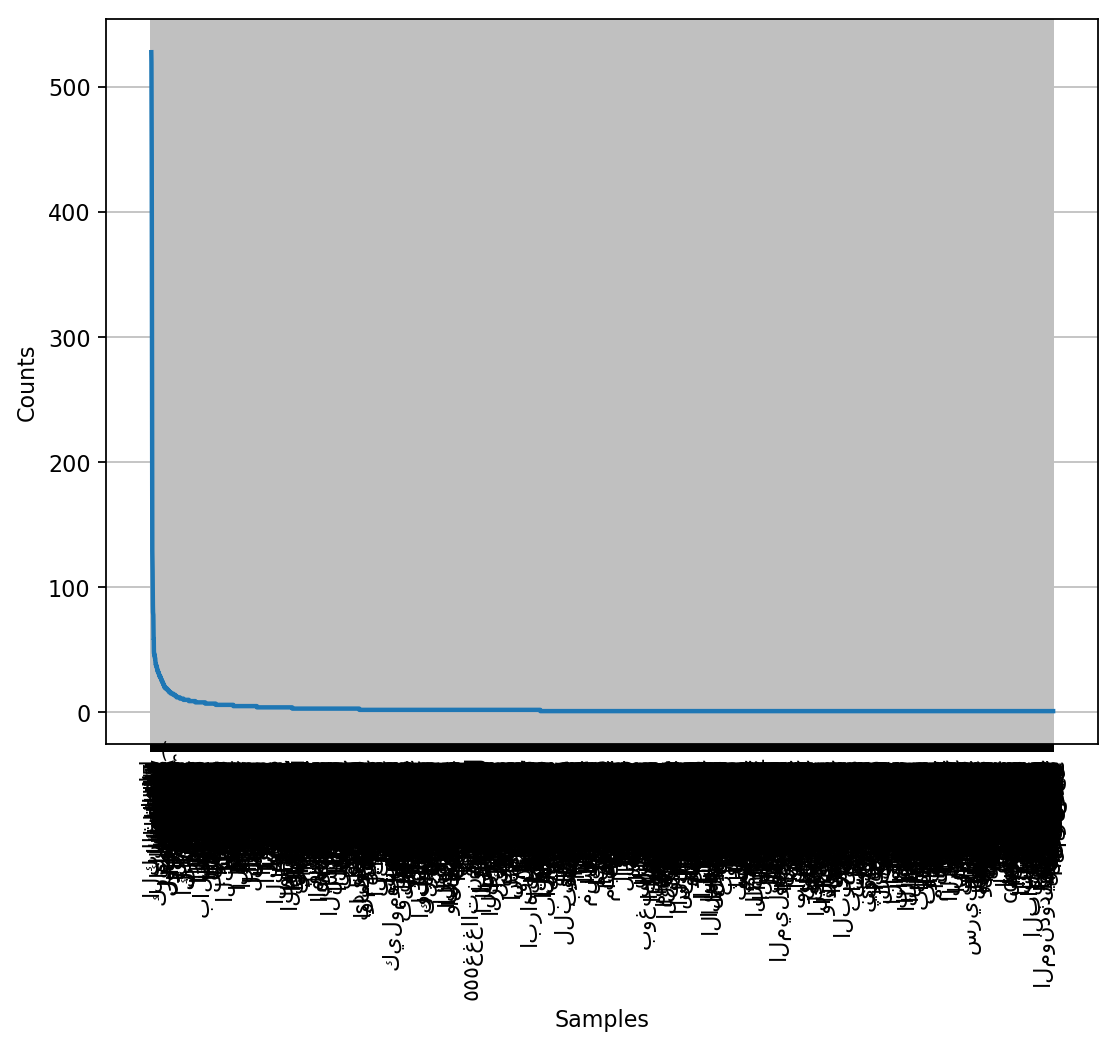

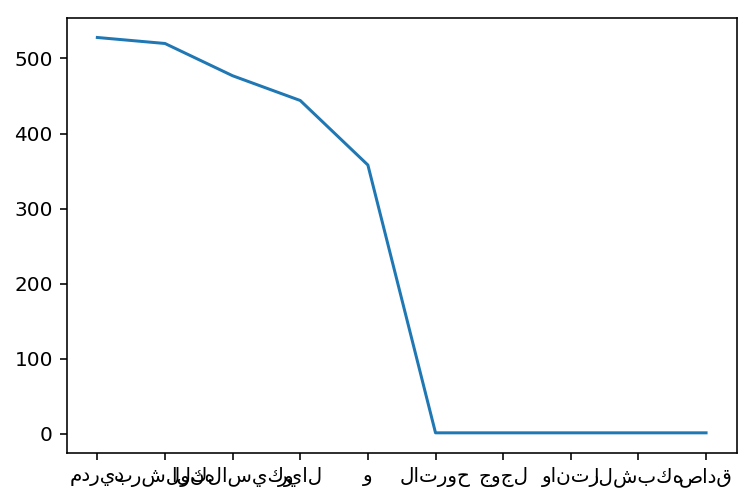

Most Common words : [('مدريد', 528), ('برشلونه', 520), ('الكلاسيكو', 477), ('ريال', 444), ('و', 358), ('علي', 237), ('ميسي', 156), ('ان', 129), ('الريال', 120), ('كان', 113)]
Least Common words [('خذ', 1), ('هالسءال', 1), ('منو', 1), ('فالديز', 1), ('بشرط', 1), ('لاتروح', 1), ('جوجل', 1), ('وانتر', 1), ('الشبكه', 1), ('صادق', 1)]


In [65]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

lstCnt=[]
lstLbl=[]
for t in fdist1.most_common(5):
    lstLbl.append(t[0])
    lstCnt.append(t[1])
for t in fdist1.most_common()[len(fdist1)-6:len(fdist1)-1]:
    lstLbl.append(t[0])
    lstCnt.append(t[1])

fdist1.plot()
plt.plot(lstLbl,lstCnt)
plt.show()
print("Most Common words : " + str(fdist1.most_common(10))
      + "\n" + "Least Common words "  + str(fdist1.most_common()[len(fdist1)-11:len(fdist1)-1]))

In [16]:
from nltk.collocations import *

all_tokens = []
tw = TweetTokenizer()
for i in range(len(tweets)):
    for token in tw.tokenize(tweets['Tweet'][i]):
        if('#' not in token and '@' not in token) and token not in stop_words:
            all_tokens.append(token)
        
finder = BigramCollocationFinder.from_words(all_tokens)    
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [17]:
collacations = finder.nbest(bigram_measures.pmi,100)
collacations[50:70]

[('اذكي', 'شخصين'),
 ('اراهم', 'الموقف'),
 ('ارثور', 'اعطوه'),
 ('ارسين', 'فينغر'),
 ('ارضك', 'وتفوقت'),
 ('ارضنا', '١٦'),
 ('ارقامه', 'الفاضحه'),
 ('ارقد', 'ياخاسر'),
 ('اروق', 'للمزاج'),
 ('اريد', 'تعلمه'),
 ('ازاي', 'بتذل'),
 ('استاذي', 'ماتقصر'),
 ('استجابا', 'لرغبه'),
 ('استغلاله', 'لتحقيق'),
 ('استمراره', 'كمهاجم'),
 ('اسم', 'هازرد'),
 ('اسماء', 'وخيارات'),
 ('اسينسيو', 'ربط'),
 ('اشارته', 'الشهيره'),
 ('اشباه', 'الرجال')]

In [18]:
all_tokens = []
tw = TweetTokenizer()
for i in range(len(tweets)):
    for token in tw.tokenize(tweets['Tweet'][i]):
        if '#' in token:
            all_tokens.append(token)
fdist2 = nltk.FreqDist(all_tokens)
fdist2.most_common(10)

[('#برشلونه_ريال_مدريد', 393),
 ('#الكلاسيكو', 123),
 ('#ريال_مدريد', 43),
 ('#برشلونه', 40),
 ('#ElClasico', 39),
 ('#ريال_مدريد_برشلونه', 37),
 ('#كلاسيكو_الارض', 34),
 ('#كلاسيكو_العالم', 25),
 ('#ForçaBarça', 24),
 ('#ElClásico', 21)]

In [19]:
#tweets = tweets.drop(['Date','Username'], axis=1)      
tweets.to_csv('tweetsFinal.txt', header=True, index=False, sep='\t', mode='w')
tweets.to_csv('tweetsFinal.csv', header=True, index=False, sep='\t', mode='w')

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_features = 5
no_topics = 3

stoplist = nltk.corpus.stopwords.words('arabic')
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words=stoplist)
tf = tf_vectorizer.fit_transform(tweets['Tweet'])
tf_feature_names = tf_vectorizer.get_feature_names()


lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=500, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 1
display_topics(lda, tf_feature_names, no_top_words)

C:\Users\Firas H\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0:
الكلاسيكو
Topic 1:
برشلونه
Topic 2:
مدريد


In [21]:
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
fit = lda.fit_transform(tf)

C:\Users\Firas H\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


اجمل حاجه حصلت النهارده هي فوز برشلونه علي الريال بخماسيه راءعه مع الرافه برغم ان الساحر ميسي لم يلعب الماتش فيما عدا ذلك كان اليوم مملا كالعاده 


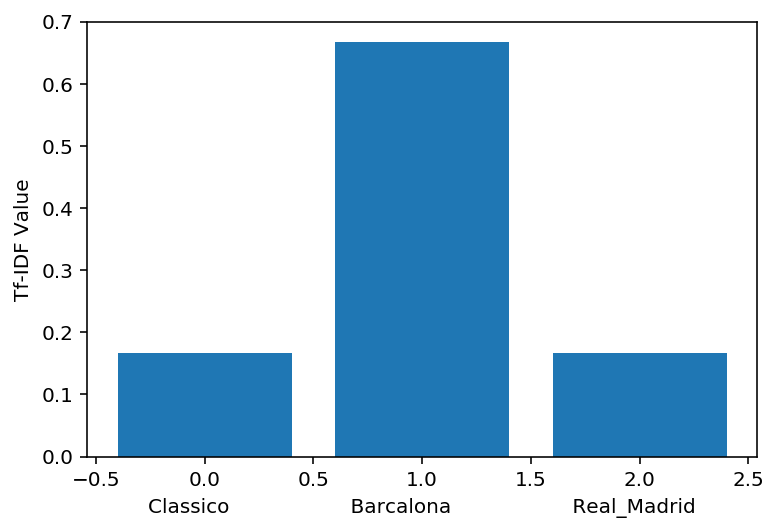

جيرارد بيكي كالعاده. #الهداف #الكلاسيكو


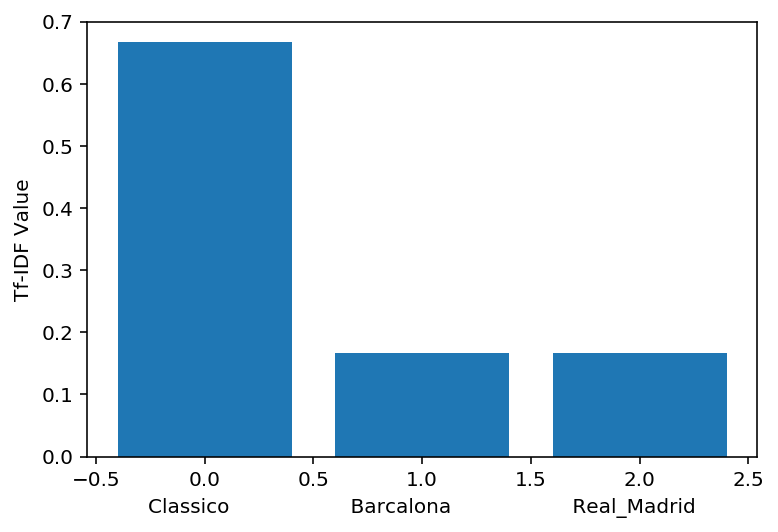

من الطبيعي الكل يشمت في فريق كان منيم اوربا من المغرب هلا مدريد #برشلونه_ريال_مدريد


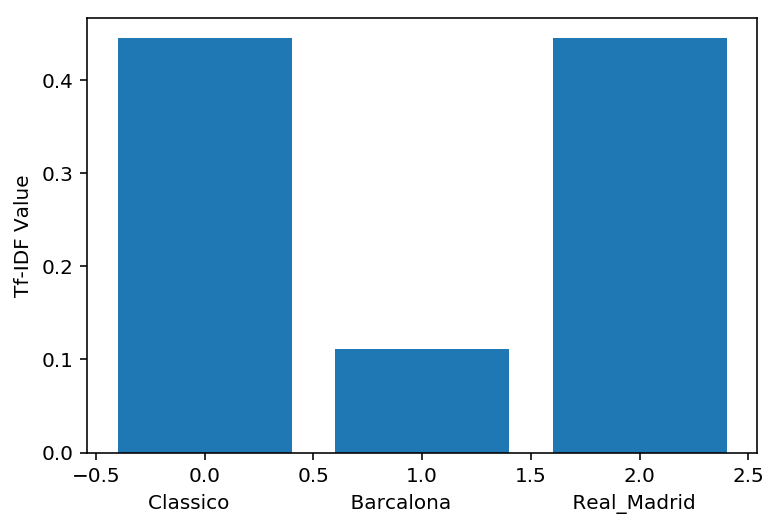

In [64]:
x = range(len(fit[0]))

print(tweets['Tweet'][51])
plt.bar(x, fit[51])
plt.ylabel("Tf-IDF Value")
plt.xlabel("Classico                   Barcalona                   Real_Madrid")
plt.show()

print(tweets['Tweet'][500])
plt.bar(x, fit[500])
plt.ylabel("Tf-IDF Value")
plt.xlabel("Classico                   Barcalona                   Real_Madrid")
plt.show()

print(tweets['Tweet'][800])
plt.bar(x, fit[800])
plt.ylabel("Tf-IDF Value")
plt.xlabel("Classico                   Barcalona                   Real_Madrid")
plt.show()

In [23]:
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(fit)

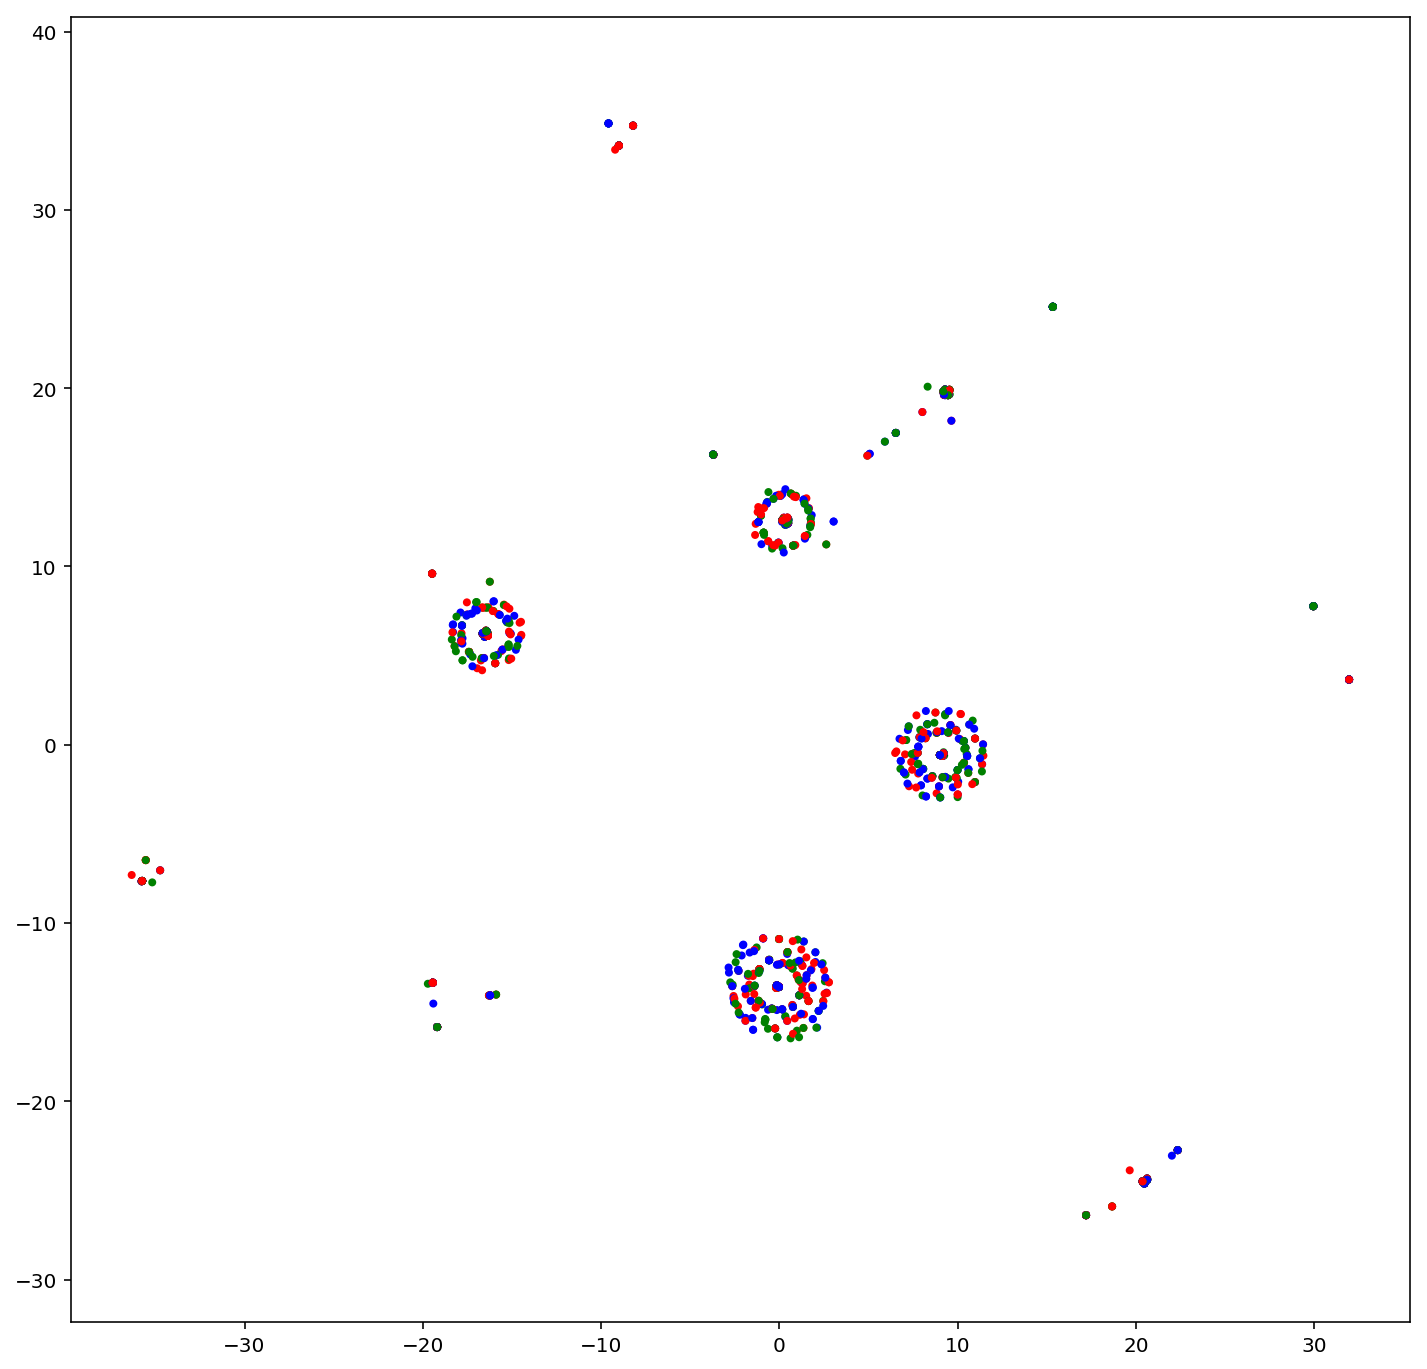

In [24]:
from matplotlib import cm
plt.figure(figsize=(12,12))
plt.scatter(X_tsne[:,0], X_tsne[:,1], marker='.', cmap=cm.Paired, c=['red','blue','green'])
plt.axis('equal')
plt.show()

In [25]:
import os
test_path = r'C:\Users\Firas H\Downloads\NLP\NLP Homework 1\test'
test_files = [i for i in os.listdir(test_path) if os.path.isfile(os.path.join(test_path,i)) and 'labeled-data' in i]

train_path = r'C:\Users\Firas H\Downloads\NLP\NLP Homework 1\train'
train_files = [i for i in os.listdir(train_path) if os.path.isfile(os.path.join(train_path,i)) and 'labeled-data' in i]

In [26]:
test_tweets = []
for i in range(len(test_files)):
    file = open("./test/"+test_files[i],"r",encoding='utf-8')
    for line in file:
        test_tweets.append(line)
test_tweets = [t.replace('\n', '') for t in test_tweets]
test_tweets = [t.replace('\ufeff', '') for t in test_tweets]

In [27]:
train_tweets = []
for i in range(len(train_files)):
    file2 = open("./train/"+train_files[i],"r",encoding='utf-8', errors='ignore')
    for line in file2:
        train_tweets.append(line)
train_tweets = [t.replace('\n', '') for t in train_tweets]
train_tweets = [t.replace('\ufeff', '') for t in train_tweets]

In [28]:
train_tweets_class = []
for i in range(len(train_tweets)):
    try:
        s = train_tweets[i].split('||')[1]
        if 'R' in s or 'B' in s:
            train_tweets_class.append(train_tweets[i].split('||')[1])
    except:
        pass
for i in range(len(train_tweets_class)):
    train_tweets_class[i] = train_tweets_class[i].replace('..','')
    train_tweets_class[i] = train_tweets_class[i].replace(' ','')
    train_tweets_class[i] = train_tweets_class[i].replace('  ','')
    
train_tweets_data = []
for i in range(len(train_tweets)):
    try:
        s = train_tweets[i].split('||')[1]
        if 'R' in s or 'B' in s:
            train_tweets_data.append(train_tweets[i].split('||')[0])
    except:
        pass

In [29]:
test_tweets_class = []
for i in range(len(test_tweets)):
    try:
        s = test_tweets[i].split('||')[1]
        if 'R' in s or 'B' in s:
            test_tweets_class.append(test_tweets[i].split('||')[1])
    except:
        pass
for i in range(len(test_tweets_class)):
    test_tweets_class[i] = test_tweets_class[i].replace('..','')
    test_tweets_class[i] = test_tweets_class[i].replace(' ','')
    test_tweets_class[i] = test_tweets_class[i].replace('  ','')
    test_tweets_class[i] = test_tweets_class[i].replace('ٌٌ','')
    
test_tweets_data = []
for i in range(len(test_tweets)):
    try:
        s = test_tweets[i].split('||')[1]
        if 'R' in s or 'B' in s:
            test_tweets_data.append(test_tweets[i].split('||')[0])
    except:
        pass

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from scipy import sparse as sp_sparse
from sklearn.metrics import accuracy_score
import numpy as np

In [31]:
all_words = []
for sent in train_tweets_data:
    for w in sent.split():
        if w not in stopwords.words('arabic'):
            all_words.append(w)

allWordDist = nltk.FreqDist(w for w in all_words)
DICT_SIZE = len(allWordDist)
INDEX_TO_WORDS = {i:word[0] for i,word in enumerate(allWordDist.most_common(DICT_SIZE))}
WORDS_TO_INDEX = {word:i for i,word in INDEX_TO_WORDS.items()}
ALL_WORDS = WORDS_TO_INDEX.keys()

In [32]:
def bag_of_words(text, words_to_index):
    result_vector = np.zeros(len(words_to_index))
    list_of_texts = text.split()
    for word in list_of_texts:
        if word in words_to_index:
            result_vector[words_to_index[word]] += 1     
    return result_vector

In [33]:
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(bag_of_words(text, WORDS_TO_INDEX)) for text in train_tweets_data])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(bag_of_words(text, WORDS_TO_INDEX)) for text in test_tweets_data])
print('X_train shape ', X_train_mybag.shape)
print('X_val shape ', X_test_mybag.shape)

X_train shape  (4361, 13570)
X_val shape  (1333, 13570)


In [34]:
from sklearn.neural_network import MLPClassifier
def train_classifier(X_train, y_train, Hidden_Layers, Activation, Solver, Alpha, n_iter):
    classifier = MLPClassifier(hidden_layer_sizes = Hidden_Layers, activation = Activation,
                               solver = Solver, alpha = Alpha ,max_iter = n_iter)
    classifier.fit(X_train, y_train)
    return classifier

In [35]:
classifier_BOW = train_classifier(X_train_mybag , train_tweets_class , (100,) , "relu" , "adam" , 0.0001 , 200)

In [36]:
y_test_predicted_labels_mybag = classifier_BOW.predict(X_test_mybag)
y_test_predicted_scores_mybag = classifier_BOW.score(X_test_mybag,test_tweets_class)

In [37]:
print('Bag-of-words Accuracy: '+ str(accuracy_score(test_tweets_class, y_test_predicted_labels_mybag)))

Bag-of-words Accuracy: 0.6924231057764441


In [38]:
def tfidf_features(X_train, X_test, grams):
    
    tfidf_vectorizer = TfidfVectorizer(min_df = 2, max_df = 0.5, ngram_range = grams)  
    tfidf_vectorizer.fit(X_train)
    X_train=tfidf_vectorizer.transform(X_train)
    X_test=tfidf_vectorizer.transform(X_test)
    
    return X_train, X_test, tfidf_vectorizer.vocabulary_

In [39]:
ngrams = [(1,1),(1,2),(1,3)]

for gram in ngrams:
    X_train_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(train_tweets_data, test_tweets_data, gram)
    classifier_tfidf = train_classifier(X_train_tfidf, train_tweets_class , (100,) , "relu" , "adam" , 0.0001 , 200)
    
    y_test_predicted_labels_tfidf = classifier_tfidf.predict(X_test_tfidf)
    y_test_predicted_scores_tfidf = classifier_tfidf.score(X_test_tfidf,test_tweets_class)
    
    print('Tfidf Accuracy using '+ str(gram[0]) +" gram :" +
          str(accuracy_score(test_tweets_class, y_test_predicted_labels_tfidf)))

Tfidf Accuracy using 1 gram :0.6916729182295573
Tfidf Accuracy using 1 gram :0.6909227306826706
Tfidf Accuracy using 1 gram :0.6864216054013503


In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import re
import numpy as np
from nltk.stem.isri import ISRIStemmer
import warnings
warnings.filterwarnings('ignore')

In [41]:
loss = ['hinge','log','squared_loss']
alpha = [0.1,0.01,0.0001]

In [42]:
for l in loss:
    for a in alpha:
        text_clf_svm = Pipeline([('vect', CountVectorizer(stopwords.words('arabic'))),
                          ('tfidf', TfidfTransformer()),
                          ('clf-svm', SGDClassifier(loss=l,
                                                    penalty='l2',
                                                    alpha= a, n_iter=500,
                                                    random_state=42)),
                             ])
        text_clf = text_clf_svm.fit(train_tweets_data, train_tweets_class)
        predicted_svm = text_clf_svm.predict(test_tweets_data)
        acc = 0
        for i in range(len(test_tweets_class)):
            if predicted_svm[i] == test_tweets_class[i]:
                acc += 1
        accuracy_percentage = acc/len(test_tweets_class)
        print("Prediction accuracy using " + l + " loss function with alpha of " + str(a) 
              +" : " + str(accuracy_percentage) + "\n")
    print("______________________________________________________________________\n")


Prediction accuracy using hinge loss function with alpha of 0.1 : 0.4891222805701425

Prediction accuracy using hinge loss function with alpha of 0.01 : 0.490622655663916

Prediction accuracy using hinge loss function with alpha of 0.0001 : 0.700675168792198

______________________________________________________________________

Prediction accuracy using log loss function with alpha of 0.1 : 0.4891222805701425

Prediction accuracy using log loss function with alpha of 0.01 : 0.4973743435858965

Prediction accuracy using log loss function with alpha of 0.0001 : 0.7104276069017255

______________________________________________________________________

Prediction accuracy using squared_loss loss function with alpha of 0.1 : 0.490622655663916

Prediction accuracy using squared_loss loss function with alpha of 0.01 : 0.5693923480870218

Prediction accuracy using squared_loss loss function with alpha of 0.0001 : 0.2618154538634659

__________________________________________________________

In [43]:
def Predect():
    text_clf_svm = Pipeline([('vect', CountVectorizer(stopwords.words('arabic'))),
                              ('tfidf', TfidfTransformer()),
                              ('clf-svm', SGDClassifier(loss="log",
                                                        penalty='l2',
                                                        alpha= 0.0001, n_iter=500,
                                                        random_state=42)),
                                 ])
    text_clf = text_clf_svm.fit(train_tweets_data, train_tweets_class)
    predicted_svm = text_clf_svm.predict(test_tweets_data)
    return np.mean(predicted_svm == test_tweets_class)
Predect()

0.7104276069017255

In [44]:
text_clf_svm = Pipeline([('vect', CountVectorizer(stopwords.words('arabic'))),
                              ('tfidf', TfidfTransformer()),
                              ('clf-svm', SGDClassifier(loss="hinge",
                                                        penalty='l2',
                                                        alpha= 0.0001, n_iter=500,
                                                        random_state=42)),
                                 ])
_ = text_clf_svm.fit(train_tweets_data, train_tweets_class)
UserInputs = [
    "افضل فريق في الدوري هو برشلونة",
    "البرشا و بس و الباقي خس",
    "النادي الملكي عشقي",
    "متعة كرة القدم عند مشاهدة مباراة للريال ❤",
    "برشلونة لا حدى يعلى عليه",
    "الدوري مابينشاف بلا ميسي و برشلونة",
    "الله على الكتلاااان"
]
text_clf_svm.predict(UserInputs)

array(['B', 'R', 'R', 'R', 'B', 'B', 'B'], dtype='<U66')

In [45]:
for i in range(len(train_tweets_data)):
    train_tweets_data[i] = re.sub(r"\b\d+\b","",train_tweets_data[i])
for i in range(len(test_tweets_data)):
    test_tweets_data[i] = re.sub(r"\b\d+\b","",test_tweets_data[i])

for i in range(len(train_tweets_data)):
    train_tweets_data[i] = normalize_searchtext(str(train_tweets_data[i]))
for i in range(len(test_tweets_data)):
    test_tweets_data[i] = normalize_searchtext(str(test_tweets_data[i]))

puncs = [",",".","``","''",";","?","--","-",")","(",":","!","...","|","…","،","..","\"","؟",":","-"]
for i in range(len(train_tweets_data)):
    if train_tweets_data[i] in puncs:
        train_tweets_data[i] = ''
for i in range(len(test_tweets_data)):
    if test_tweets_data[i] in puncs:
        test_tweets_data[i] = ''
        
st = ISRIStemmer()
for i in range(len(train_tweets_data)):
    train_tweets_data[i] = st.stem(train_tweets_data[i])
for i in range(len(test_tweets_data)):
    test_tweets_data[i] = st.stem(test_tweets_data[i])

In [46]:
Predect()

0.7036759189797449

In [47]:
for i in range(len(train_tweets_data)):
    train_tweets_data[i] = ' '.join(re.sub("(([~# \t]))"," ",train_tweets_data[i]).split())
for i in range(len(test_tweets_data)):
    test_tweets_data[i] = ' '.join(re.sub("(([~# \t]))"," ",test_tweets_data[i]).split())

In [48]:
Predect()

0.7036759189797449

In [49]:
for i in range(len(train_tweets_data)):
    train_tweets_data[i] = ' '.join(re.sub("([~_]|[~#])"," ",train_tweets_data[i]).split())
for i in range(len(test_tweets_data)):
    test_tweets_data[i] = ' '.join(re.sub("([~_]|[~#])"," ",test_tweets_data[i]).split())

In [50]:
Predect()

0.705926481620405